# Text into Data with Library

DS 5001 Text as Data

## Purpose

Ww import a text using the  Clip, Chunk, and Split pattern using the bespoke `TextImporter` class.

## Import libraries

In [3]:
import pandas as pd
import configparser
import sys

## Import Config

In [4]:
config = configparser.ConfigParser()
config.read("../../../env.ini")
data_home = config['DEFAULT']['data_home']
output_dir = config['DEFAULT']['output_dir']
local_lib = config['DEFAULT']['local_lib']

In [5]:
sys.path.append(local_lib)
from textimporter import TextImporter

In [6]:
data_home, output_dir

('/sfs/gpfs/tardis/home/rca2t/Documents/MSDS/DS5001/DS5001-2025-01-R/data',
 '/sfs/gpfs/tardis/home/rca2t/Documents/MSDS/DS5001/DS5001-2025-01-R/output')

In [7]:
text_file = f"{data_home}/gutenberg/pg105.txt"
# csv_file  = f"{output_dir}/austen-persuasio-from-lib.csv" # The file we will create

In [8]:
OHCO = ['chap_num', 'para_num', 'sent_num', 'token_num']

In [10]:
clip_pats = [
    r"\*\*\*\s*START OF (?:THE|THIS) PROJECT",
    r"\*\*\*\s*END OF (?:THE|THIS) PROJECT"
]

In [12]:
chap_pat = r"^\s*(?:chapter|letter)\s+\d+"

In [14]:
my_text = TextImporter(src_file=text_file, ohco_pats=[('chap', chap_pat, 'm')], clip_pats=clip_pats)
my_text.import_source()
my_text.parse_tokens()
my_text.extract_vocab()

Importing  /sfs/gpfs/tardis/home/rca2t/Documents/MSDS/DS5001/DS5001-2025-01-R/data/gutenberg/pg105.txt
Clipping text
Parsing OHCO level 0 chap_id by milestone ^\s*(?:chapter|letter)\s+\d+
Parsing OHCO level 1 para_num by delimitter \n\n
Parsing OHCO level 2 sent_num by delimitter [.?!;:]+
Parsing OHCO level 3 token_num by delimitter [\s',-]+


In [15]:
my_text.TOKENS

token_str    term_str
chap_id para_num sent_num token_num                        
1       0        0        0                 Sir         sir
                          1              Walter      walter
                          2              Elliot      elliot
                          3                  of          of
                          4            Kellynch    kellynch
...                                         ...         ...
24      17       0        7                  of          of
                          8          Persuasion  persuasion
                          9                  by          by
                          10               Jane        jane
                          11             Austen      austen

[84904 rows x 2 columns]

In [16]:
my_text.VOCAB

,n,n_chars,p,s,i,h
term_str,,,,,,
the,3330,3,0.039221,25.496697,4.672238,0.183249
to,2808,2,0.033073,30.236467,4.918218,0.162658
and,2800,3,0.032978,30.322857,4.922334,0.162331
of,2572,2,0.030293,33.010886,5.044870,0.152824
a,1595,1,0.018786,53.231348,5.734204,0.107722
...,...,...,...,...,...,...
reins,1,5,0.000012,84904.000000,16.373545,0.000193
judiciously,1,11,0.000012,84904.000000,16.373545,0.000193
rut,1,3,0.000012,84904.000000,16.373545,0.000193


## Visualize VOCAB stats

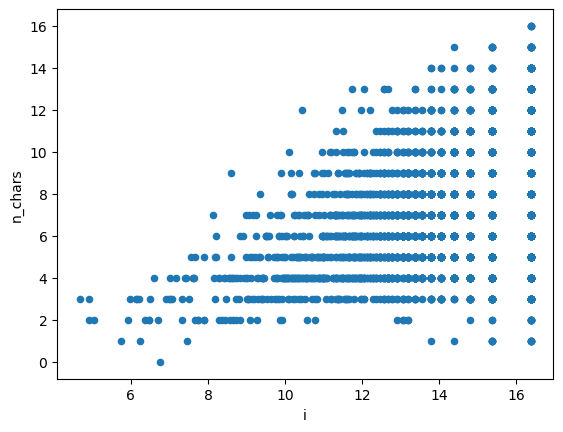

In [17]:
my_text.VOCAB.plot.scatter('i','n_chars');

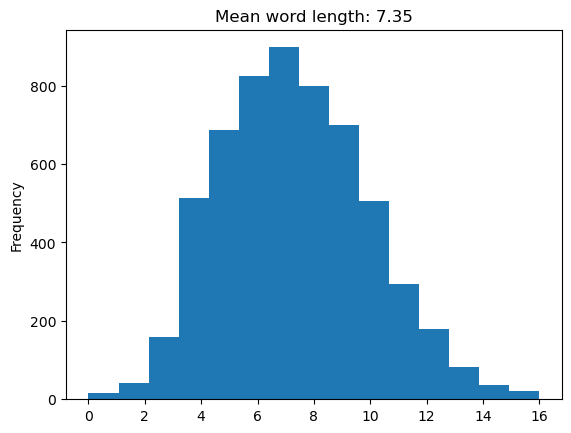

In [31]:
mean_word_len = my_text.VOCAB.n_chars.mean().round(2)
my_text.VOCAB.n_chars.plot.hist(bins=15, title=f"Mean word length: {mean_word_len}");